In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [38]:
from pathlib import Path

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

pd.set_option("display.max_columns", 100)

DATA_PATH = Path.cwd().parent / "content" / "drive" / "My Drive" / "Fare_Classification"

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 

In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [5]:
!pip install catboost

     |████████████████████████████████| 64.8MB 61kB/s 


In [6]:
from catboost import CatBoostClassifier

In [7]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) 

In [40]:
features_df = pd.read_csv(
    DATA_PATH / "train.csv", 
    index_col="tripid"
)


In [9]:
features_df = features_df[features_df.isnull().sum(axis=1) < 5]

In [11]:
features_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,1
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,1
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1


In [41]:
features_df['label'] = features_df['label'].map({'correct': 1, 'incorrect': 0})

In [42]:
y= features_df["label"]

In [43]:
X = features_df.drop(columns=["label"], axis=1)

In [30]:
import seaborn
correlation_train = X.copy()
correlations = correlation_train.corr()


Text(0.5, 1.0, 'Fare class correlations')

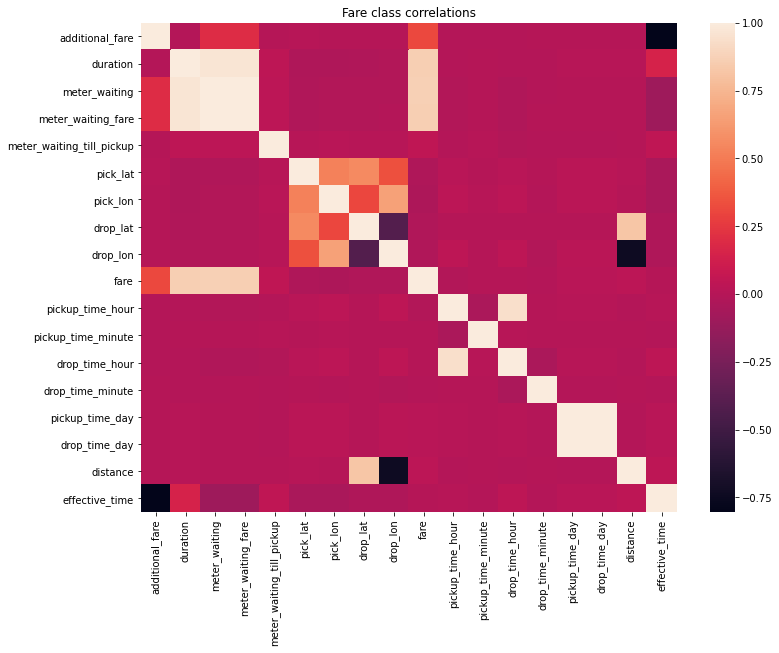

In [31]:
plt.figure(figsize=(12, 9))
correlations_sj_heatmap = seaborn.heatmap(correlations)
plt.title('Fare class correlations')

In [32]:
test_features_df = pd.read_csv(DATA_PATH / "test.csv", 
                               index_col="tripid")

In [ ]:
test_features_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79


In [ ]:
X

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39
...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20


In [ ]:
X

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39
...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20


In [44]:
X = X.fillna(X.mean())

In [20]:
test_features_df = test_features_df.fillna(test_features_df.mean())

In [45]:
X["pickup_time"] = pd.to_datetime(X["pickup_time"],errors = "coerce")

In [46]:
X["drop_time"] = pd.to_datetime(X["drop_time"],errors = "coerce")

In [47]:
X["pickup_time_hour"] = X["pickup_time"].dt.hour

In [48]:
X["pickup_time_minute"] = X["pickup_time"].dt.minute

In [49]:
X["drop_time_hour"] =X["drop_time"].dt.hour

In [50]:
X["drop_time_minute"] =X["drop_time"].dt.minute

In [51]:
X["pickup_time_day"] = X["pickup_time"].dt.day
# X["pickup_time_month"] = X["pickup_time"].dt.month
X["drop_time_day"] = X["drop_time"].dt.day
# X["drop_time_month"] = X["drop_time"].dt.month
# X["pick_up_year"] = X["drop_time"].dt.year
# X["drop_year"] = X["drop_time"].dt.year

In [52]:
X["distance"] =  distance(X["pick_lat"],X["pick_lon"],X["drop_lat"],X["drop_lon"])

In [53]:
X["effective_time"] = X["duration"]-X["meter_waiting"]


In [ ]:
X

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,pickup_time_hour,pickup_time_minute,drop_time_hour,drop_time_minute,pickup_time_day,drop_time_day,distance,effective_time
tripid,,,,,,,,,,,,,,,,,,,,
189123628,10.500000,834.000000,56.000000,0.000000,64.000000,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,0,20,0,34,1,1,3.164501,778.000000
189125358,10.500000,791.000000,47.000000,0.000000,134.000000,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,0,56,1,9,1,1,1.968540,744.000000
189125719,10.500000,1087.000000,80.000000,0.000000,61.000000,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1,8,1,26,1,1,3.917991,1007.000000
189127273,10.500000,598.000000,271.000000,15.663800,68.000000,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,2,27,2,37,1,1,0.535588,327.000000
189128020,13.719651,1702.858077,629.074231,32.057666,112.466832,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,3,34,3,51,1,1,5.062797,1073.783846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.500000,838.000000,93.000000,5.421900,451.000000,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,22,7,22,21,31,31,1.308220,745.000000
213812756,10.500000,2151.000000,428.000000,0.000000,39.000000,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,23,7,23,43,31,31,6.753297,1723.000000
213813930,10.500000,263.000000,9.000000,0.000000,110.000000,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,23,21,23,25,31,31,0.649655,254.000000


In [33]:
test_features_df["pickup_time"] = pd.to_datetime(test_features_df["pickup_time"],errors = "coerce")
test_features_df["drop_time"] = pd.to_datetime(test_features_df["drop_time"],errors = "coerce")
test_features_df["pickup_time_hour"] = test_features_df["pickup_time"].dt.hour
test_features_df["pickup_time_minute"] = test_features_df["pickup_time"].dt.minute
test_features_df["drop_time_hour"] =test_features_df["drop_time"].dt.hour
test_features_df["drop_time_minute"] =test_features_df["drop_time"].dt.minute
test_features_df["effective_time"] = test_features_df["duration"]-test_features_df["meter_waiting"]
test_features_df["pickup_time_day"] = test_features_df["pickup_time"].dt.day
# test_features_df["pickup_time_month"] = test_features_df["pickup_time"].dt.month
test_features_df["drop_time_day"] = test_features_df["drop_time"].dt.day
# test_features_df["drop_time_month"] = test_features_df["drop_time"].dt.month
# test_features_df["pick_up_year"] = test_features_df["drop_time"].dt.year
# test_features_df["drop_year"] = test_features_df["drop_time"].dt.year
# test_features_df["distance"] =(test_features_df["pick_lat"]-test_features_df["drop_lat"])**2 + (test_features_df["pick_lon"]-test_features_df["drop_lon"])**2
test_features_df["distance"] =  distance(test_features_df["pick_lat"],test_features_df["pick_lon"],test_features_df["drop_lat"],test_features_df["drop_lon"])

# test_features_df["effective_fare"] = test_features_df["fare"]+test_features_df["additional_fare"]
# test_features_df["mean_fare_for_unit_length"] = test_features_df["fare"]/test_features_df["distance"]
# test_features_df["duration_fare"] = test_features_df["duration"]*test_features_df["fare"]

In [ ]:
# test_features_df["effective_time"] = (test_features_df["effective_time"] -test_features_df["effective_time"].mean() )/test_features_df["effective_time"].std() 
# test_features_df["effective_fare"] = (test_features_df["effective_fare"] -test_features_df["effective_fare"].mean() )/test_features_df["effective_fare"].std() 
# test_features_df["mean_fare_for_unit_length"] = (test_features_df["mean_fare_for_unit_length"] -test_features_df["mean_fare_for_unit_length"].mean() )/test_features_df["mean_fare_for_unit_length"].std() 
# test_features_df["duration_fare"] = (test_features_df["duration_fare"] -test_features_df["duration_fare"].mean() )/test_features_df["duration_fare"].std() 


In [ ]:
# test_features_df = test_features_df.drop(columns=["pickup_time","drop_time"],axis=1)

In [ ]:
# X2 = test_features_df.values 
# x2_scaled = min_max_scaler.fit_transform(X2)
# test_features_df = pd.DataFrame(x2_scaled)
test_features_df

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,pickup_time_hour,pickup_time_minute,drop_time_hour,drop_time_minute,effective_time,pickup_time_day,drop_time_day,distance
tripid,,,,,,,,,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27,0,38,0,53,882,1,1,4.166730
213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70,1,2,2,13,4229,1,1,25.823263
213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00,5,2,5,28,1297,1,1,3.676453
213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32,5,30,5,38,446,1,1,2.051619
213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47,7,0,7,14,422,1,1,1.608445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,21,28,21,56,1294,16,16,2.444643
222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,21,59,22,22,1298,16,16,4.671116
222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,22,2,22,9,362,16,16,1.278300


In [34]:
categorical_var1 = np.where(test_features_df.dtypes != np.float )[0]

In [ ]:
categorical_var1

array([ 1,  2,  4,  5,  6, 12, 13, 14, 15, 16, 17, 18])

In [ ]:
X.dtypes

additional_fare                     float64
duration                            float64
meter_waiting                       float64
meter_waiting_fare                  float64
meter_waiting_till_pickup           float64
pickup_time                  datetime64[ns]
drop_time                    datetime64[ns]
pick_lat                            float64
pick_lon                            float64
drop_lat                            float64
drop_lon                            float64
fare                                float64
pickup_time_hour                      int64
pickup_time_minute                    int64
drop_time_hour                        int64
drop_time_minute                      int64
pickup_time_day                       int64
drop_time_day                         int64
distance                            float64
effective_time                      float64
dtype: object

In [35]:
categorical_var = np.where(X.dtypes != np.float )[0]

In [ ]:
categorical_var

array([ 5,  6, 12, 13, 14, 15, 16, 17])

In [54]:
model = CatBoostClassifier(iterations=500000, l2_leaf_reg = 3.5)

In [ ]:
model.fit(X,y,plot=False)

In [ ]:
prediction = model.predict(test_features_df)

In [ ]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
submission_df = pd.read_csv(DATA_PATH / "sample_submission.csv", 
                            index_col="tripid")

In [ ]:
X.head()


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,pickup_time_hour,pickup_time_minute,drop_time_hour,drop_time_minute,pickup_time_day,drop_time_day,distance,effective_time
tripid,,,,,,,,,,,,,,,,,,,,
189123628,10.500000,834.000000,56.000000,0.000000,64.000000,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,0,20,0,34,1,1,3.164501,778.000000
189125358,10.500000,791.000000,47.000000,0.000000,134.000000,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,0,56,1,9,1,1,1.968540,744.000000
189125719,10.500000,1087.000000,80.000000,0.000000,61.000000,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1,8,1,26,1,1,3.917991,1007.000000
189127273,10.500000,598.000000,271.000000,15.663800,68.000000,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,2,27,2,37,1,1,0.535588,327.000000
189128020,13.719651,1702.858077,629.074231,32.057666,112.466832,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,3,34,3,51,1,1,5.062797,1073.783846


In [ ]:
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)


In [ ]:
submission_df["prediction"] = prediction[:]

In [ ]:
submission_df.head()

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1


In [ ]:
submission_df.to_csv(DATA_PATH / 'final.csv', index=True)